In [1]:
from sklearn import datasets
from polyssifier import poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_classification
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

(500, 2)
(500,)
                                 mean       std       min       max
Multilayer Perceptron train  0.945326  0.003201  0.941682  0.947685
                      test   0.927588  0.008685  0.920743  0.937358
Nearest Neighbors     train  0.941582  0.005668  0.936547  0.947721
                      test   0.919061  0.011822  0.911453  0.932681
SVM                   train  0.917366  0.011477  0.910655  0.930618
                      test   0.903057  0.002547  0.900131  0.904776
Linear SVM            train  0.902608  0.003627  0.899100  0.906343
                      test   0.903144  0.006267  0.897227  0.909711
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.777897  0.032787  0.740964  0.803571
Random Forest         train  0.999731  0.000234  0.999570  1.000000
                      test   0.886372  0.012659  0.872478  0.897251
Logistic Regression   train  0.902572  0.003588  0.899064  0.906235
                      test   0.9

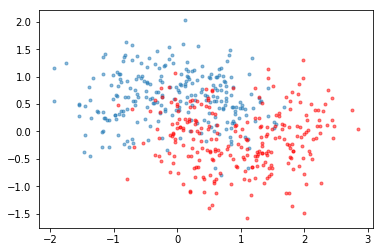

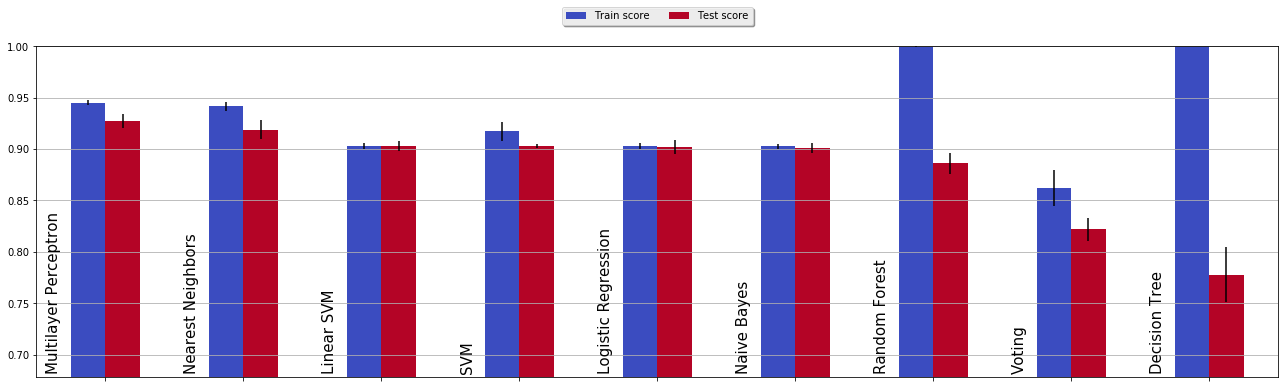

In [3]:
data, label = make_moons(n_samples=500, noise=0.4)
print(data.shape)
print(label.shape)

plt.plot(data[label==0,0], data[label==0,1],'.', alpha=.5);
plt.plot(data[label==1,0], data[label==1,1],'r.', alpha=.5);
report = poly(data,label, n_folds=3, verbose=True, save=False, scale=True,
              feature_selection=False, scoring='auc', concurrency=1)
report.plot_scores()

In [4]:
report.scores


Multilayer Perceptron           Nearest Neighbors                 SVM  \
                  train      test             train      test     train   
0              0.941682  0.937358          0.936547  0.932681  0.910655   
1              0.947685  0.920743          0.940478   0.91305  0.930618   
2               0.94661  0.924663          0.947721  0.911453  0.910825   

            Linear SVM           Decision Tree           Random Forest  \
       test      train      test         train      test         train   
0  0.904266   0.902381  0.902494             1  0.803571             1   
1  0.900131     0.8991  0.909711             1  0.789157      0.999624   
2  0.904776   0.906343  0.897227             1  0.740964       0.99957   

            Logistic Regression           Naive Bayes              Voting  \
       test               train      test       train      test     train   
0  0.897251            0.902417   0.90292    0.901437  0.902778  0.855422   
1  0.889389            0.899064  0.909421    0.900355  0.905647  0.886228   
2  0.872478            0.906235  0.893744    0.906415   0.89476  0.844311   

             
       test  
0  0.833333  
1  0.825301  
2  0.807229

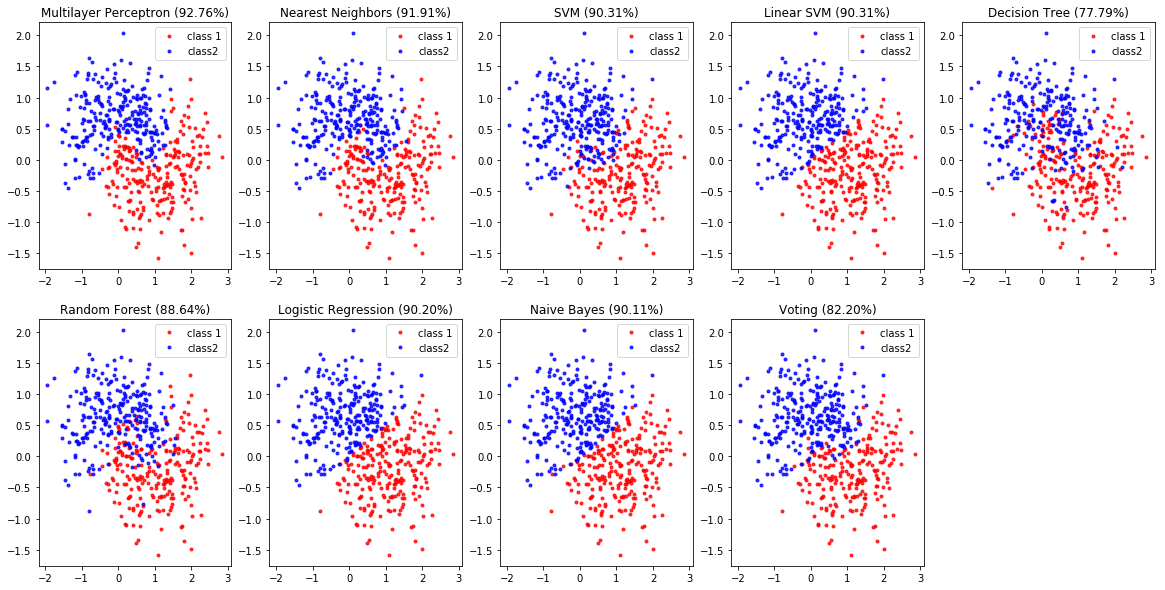

In [8]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(report.predictions.items()):
    plt.subplot(2,5,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(report.scores[key]['test']) ))

                                 mean       std       min       max
Multilayer Perceptron train  0.999534  0.000807  0.998602  1.000000
                      test   0.951684  0.010790  0.945412  0.964142
Nearest Neighbors     train  0.972222  0.008910  0.965801  0.982394
                      test   0.916402  0.008274  0.906913  0.922111
SVM                   train  0.965889  0.012840  0.954798  0.979956
                      test   0.939810  0.013099  0.929443  0.954532
Linear SVM            train  0.901746  0.007099  0.895238  0.909316
                      test   0.889410  0.012693  0.879646  0.903758
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.761942  0.057203  0.706110  0.820425
Random Forest         train  0.999958  0.000073  0.999874  1.000000
                      test   0.917728  0.011949  0.908778  0.931297
Logistic Regression   train  0.901388  0.006407  0.895382  0.908133
                      test   0.888347  0.013825 

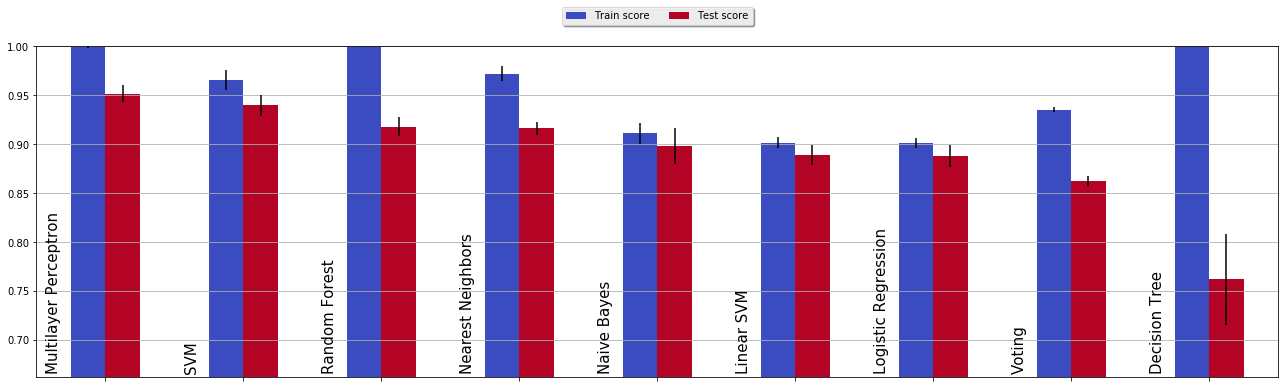

In [10]:
data, label = make_classification(n_samples=500, n_features=20,
                                  n_informative=5, n_redundant=2,
                                  n_repeated=0, n_classes=2,
                                  n_clusters_per_class=2, weights=None,
                                  flip_y=0.01, class_sep=1.0,
                                  hypercube=True, shift=0.0,
                                  scale=1.0, shuffle=True,
                                  random_state=None)
report = poly(data, label, n_folds=3, verbose=True,
              feature_selection=True, save=False, concurrency=1)
report.plot_scores()

In [11]:
for key, val in report.confusions.items():
    print(key)
    print(val)

Multilayer Perceptron
[[ 219.   29.]
 [  31.  221.]]
Nearest Neighbors
[[ 217.   31.]
 [  38.  214.]]
SVM
[[ 221.   27.]
 [  38.  214.]]
Linear SVM
[[ 197.   51.]
 [  42.  210.]]
Decision Tree
[[ 185.   63.]
 [  56.  196.]]
Random Forest
[[ 208.   40.]
 [  40.  212.]]
Logistic Regression
[[ 197.   51.]
 [  45.  207.]]
Naive Bayes
[[ 197.   51.]
 [  51.  201.]]
Voting
[[ 224.   24.]
 [  45.  207.]]


In [13]:
report.test_proba.head()


,Multilayer Perceptron,Nearest Neighbors,SVM,Linear SVM,Decision Tree,Random Forest,Logistic Regression,Naive Bayes,Voting
0,0.000005,0.6,0.371396,0.289353,1.0,0.4,0.306328,0.481176,1.0
1,0.999995,0.4,0.628604,0.266117,0.0,0.6,0.693672,0.518824,1.0
2,0.000046,0.2,0.081778,-2.392563,0.0,0.0,0.323797,0.293630,0.0
3,0.999954,0.8,0.918222,-0.211439,1.0,1.0,0.676203,0.706370,0.0
4,1.000000,1.0,0.760359,0.694488,0.0,0.6,0.998923,0.999957,1.0
